Reinforcement Learning

In [1]:
import gym
import numpy as np
import pandas as pd
import math
%matplotlib notebook
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('CartPole-v1')

In [3]:
obs = env.reset()
obs
# Position   Speed   Angle    Rotation speed

array([ 0.01720557, -0.00630935,  0.01741073, -0.03106677], dtype=float32)

In [4]:
env.action_space

Discrete(2)

In [5]:
env.action_space.n

2

In [6]:
push_left = 0
push_right = 1

In [7]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

In [8]:
action =push_right
obs, reward, done, info = env.step(action)

In [9]:
obs

array([ 0.01707938,  0.18855865,  0.01678939, -0.31820598], dtype=float32)

In [10]:
reward

1.0

In [11]:
done

False

In [12]:
info

{}

# A simple attempt at controlling the cart-pole

In [13]:
def simple_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

In [14]:
totals = []
for episode in range(500):
    obs = env.reset()
    episode_rewards = 0
    for step in range(200):
        action = simple_policy(obs)
        obs,reward,done,info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

In [15]:
totals_chart = pd.DataFrame(totals)

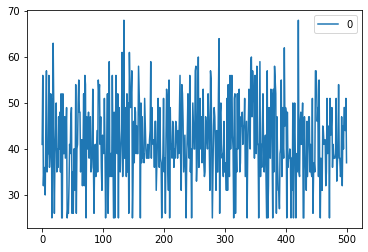

In [16]:
ax = totals_chart.plot.line()

In [17]:
totals_chart.describe()

,0
count,500.000000
mean,41.660000
std,8.899596
min,25.000000
25%,36.000000
50%,40.000000
75%,48.000000
max,68.000000


# Q-Learning 

In [24]:
env = gym.make('CartPole-v0')

In [25]:
buckets=(1,1,6,12,)

In [26]:
buckets +(env.action_space.n,)

(1, 1, 6, 12, 2)

In [28]:
Q = np.zeros(buckets + (env.action_space.n,))
Q

array([[[[[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0

In [29]:
n_episodes = 200
min_alpha = 0.1
min_epsilon = 0.1
gamma = 1.0
ada_divisor = 25
max_env_steps = None
monitor = False

In [ ]:
def discretize(obs):
    